# 50p particle for 1000 second

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
import pylab


# dynamics for 'k' number of particle
k = 20 #number of particle
print('This is for number of particle = ', k)


# 2-dimensional motion
dim = 2
print('The dimension of brownian motion = ', dim)



#setting parameter in their SI unit
kb = 1.38e-23 #Boltzman constant
T = 298.15 # thermodynamics temperature
eta = 8.90e-4 # viscosity of water at room temperature
a = 2e-6  #radius of particle



#-------------Diffusion coefficient-----------------------
D = (kb*T)/(6*(math.pi)*eta*a) # Diffusion coefficient 
print("Diffusion constant (theoretical value):", D, "SI unit")



#time interval setting
delta_t = .01  # time step length
end_t = 1e5    #maximum time to run dynamics
t_step = np.arange(0,end_t, delta_t) # creating intervals 
n = len(t_step)
print('Maximum time for simulation is in second :', end_t)
print('Total number of time steps :', n)




#----------------Parameter for Gaussian distribution
mu = 0  # mean value of Gaussian distribution
sigma = math.sqrt(2*D*delta_t) # standard deviation
print("sigma = ",sigma, "meter")



#--------array to store random steps in X direction of k particles  : 
arr_rand_x = [[0 for x in range(n)] for y in range(k)] 


# particles random steps in X direction generated by Psuedo random number generator(PRNG)--------------
count = 0
while (count < k):
    arr_rand_x[count] = np.random.normal(mu, sigma, n)
    count = count +1
    
#---------instantenous position along Y motion------
# k particles instantenous X position
arr_x = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_x[count] = np.cumsum(arr_rand_x[count])
    count = count +1


    


#--------array to store random steps in Y direction of k particles  : 
arr_rand_y = [[0 for x in range(n)] for y in range(k)] 


# K particle random steps in Y direction--------------
count = 0
while (count < k):
    arr_rand_y[count] = np.random.normal(mu, sigma, n)
    count = count +1

#---------instantenous position along Y motion------
# k particles instantenous Y position
arr_y = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_y[count] = np.cumsum(arr_rand_y[count])
    count = count +1

    
    

# starting from origin
count=0
while(count<k):
    arr_x[count][0] = 0
    arr_y[count][0] = 0
    count= count+1

#------------------color for graphs------------
#list of colors from which we will selected some random colors to distinguish one line from another line 
color =['aqua','black','blueviolet','brown','burlywood','cadetblue','chocolate','coral','cornflowerblue','darkblue','darkgoldenrod','darkgreen','darkorange','darkred','darksalmon','darkseagreen','darkslateblue','darkslategray','darkviolet','deeppink','deepskyblue','dodgerblue','firebrick','forestgreen','fuchsia','gold','goldenrod','gray','green','greenyellow','hotpink','lawngreen','lightgreen','lightpink','lightseagreen','lightsteelblue','lime','limegreen','magenta','maroon','mediumaquamarine','mediumblue','mediumorchid','mediumpurple','mediumseagreen','mediumturquoise','mediumvioletred','midnightblue','navy','olive','olivedrab','orange','orangered','orchid','palegreen','palevioletred','peachpuff','peru','pink','plum','powderblue','purple','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown','seagreen','silver','skyblue','slateblue','slategray','springgreen','steelblue','tan','turquoise','violet','wheat','yellow','yellowgreen']





This is for number of particle =  20
The dimension of brownian motion =  2
Diffusion constant (theoretical value): 1.2262888365230538e-13 SI unit
Maximum time for simulation is in second : 100000.0
Total number of time steps : 10000000
sigma =  4.952350626769179e-08 meter


In [ ]:
import random
color_list = random.sample(color,k)



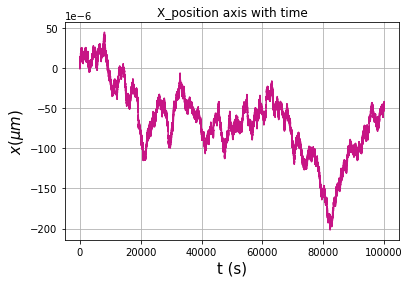

In [3]:
#-------x position with time------
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  plotting ahead %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
#x position with time
count = 0
while(count<k):
    plt.plot(t_step,arr_x[count], color_list[count])
    count = count+1

        
plt.ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))
  
plt.title('X_position axis with time')
plt.xlabel('t (s)', fontsize=15)
plt.ylabel(r'$x (\mu m)$', fontsize=15)
plt.grid(True)

#plt.savefig('Desktop/1p1000s/x position with time.png')


plt.show()

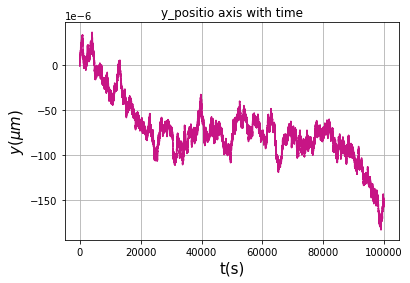

In [4]:
#-------y position with time
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% plotting ahead %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
#x position with time
count = 0
while(count<k):
    plt.plot(t_step,arr_y[count], color_list[count])
    count = count+1

        
plt.ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))
  
plt.title('y_positio axis with time')
plt.xlabel('t(s)', fontsize=15)
plt.ylabel(r'$y (\mu m)$', fontsize=15)
plt.grid(True)

#plt.savefig('Desktop/1p1000s/y position with time.png')


plt.show()


In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


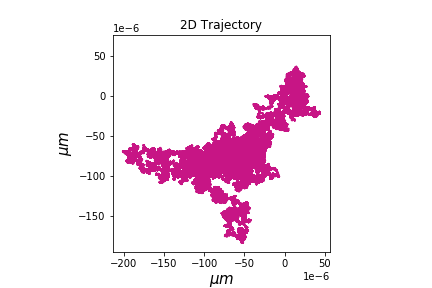

In [9]:
#plotting all particle msd in r with time
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% plotting ahead %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
#-----particle trajectory in x-y plane
count = 0
while(count<k):
    plt.plot(arr_x[count] ,arr_y[count] , color_list[count])
    count = count+1
 
plt.axis('square')
plt.ticklabel_format(style='sci', axis='x', scilimits=(-6,-6))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))

plt.title('2D Trajectory', )
plt.xlabel(r'$ \mu m$', fontsize=15)
plt.ylabel(r'$ \mu m$', fontsize=15)

#plt.savefig('Desktop/1p1000s/position on x-y plane with time.png')

plt.show()



    


In [108]:
#----------------------------------------MEAN SQUARE DISPLACEMENT CALCULATION AHEAD-------------------------------

# -------------------------Mean square displacent function and Time lag----------------------- 
import statistics as stat
from numba import jit

# ---------mean square displacement function---------- 

@jit
def msd_1d(x):
    result = np.zeros_like(x)
    for delta in range(1,len(x)):
        thisresult = 0
        for i in range(delta,len(x)):
            thisresult += (x[i] - x[i-delta])**2
        result[delta] = thisresult / (len(x) - delta)
    return result
    

In [109]:
# -------------------------------------------mean square displacement  in X---------- 


arr_msd_1d_x = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_msd_1d_x[count] = msd_1d(arr_x[count])
    count = count +1
    
    
    


In [110]:
# -------------------------------------------mean square displacement  in Y---------- 


arr_msd_1d_y = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_msd_1d_y[count] = msd_1d(arr_y[count])
    count = count +1
    



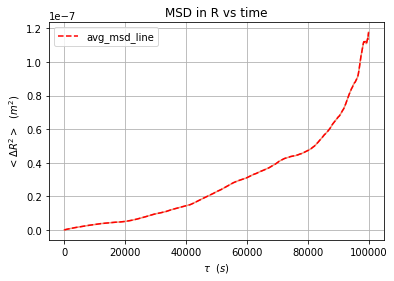

In [111]:
# ---------------------------------------------- msd for R = (msd for x) + (msd for y) -------

arr_msd_2d = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_msd_2d[count] = arr_msd_1d_x[count] + arr_msd_1d_y[count] 
    count = count +1
    


# average of  msd in R direction for all particle trajectory 

m_avg = np.transpose(arr_msd_2d)

avg_msd_2d = np.zeros(n)

count = 0
while (count < n):
    avg_msd_2d[count] = stat.mean(m_avg[count])
    count = count + 1


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Plotting ahead %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
count = 0
while (count < k):
    plt.plot(t_step, arr_msd_2d[count], color_list[count])
    count = count +1

pylab.plot(t_step,avg_msd_2d,'r--', label = 'avg_msd_line')
pylab.legend(loc='upper left')

plt.title('MSD in R vs time')
plt.ylabel(r'$<\Delta R^2> \ \  (m^2)$')
plt.xlabel(r'$\tau \ \  (s)$')
pylab.legend(loc='upper left')

#plt.savefig('__msd for R_20p_1000s.png')
plt.grid(True)
plt.show()

In [120]:
#--------------------------------------------------magnifying plottig  near origin of msd in R 
t_limit = 1000
m = int(t_limit/delta_t)

arr_msd_sliced = [[0 for x in range(n)] for y in range(k)] 

t_step_m = np.linspace(0,t_limit,m-1) # creating intervals 

avg_msd_sliced = (avg_msd_2d)[1:m:1]

count = 0
while (count < k):
    arr_msd_sliced[count] = (arr_msd_2d[count])[1:m:1]
    count = count +1

#t_step_m = np.linspace(0,m*delta_t,m-1) # creating intervals 

#avg_msd_sliced = (avg_msd_2d)[1:m:1]


# best fit line

In [121]:
from scipy.stats import linregress
linregress(t_step_m,  avg_msd_sliced)

D_sim = (linregress(t_step_m,  avg_msd_sliced)[0])/(2*dim)


print('Simulation diffusion coefficient',D_sim)

print('theoretocal diffusion coefficient',D)




Simulation diffusion coefficient 8.818701392236927e-14
theoretocal diffusion coefficient 1.2262888365230538e-13


In [122]:
# relative error in Diffusion constant
rel_err = (abs((D_sim - D)/D))* 100
print('relative error is: %.2f %%' %rel_err)

relative error is: 28.09 %


# Importing data 

In [20]:
import pandas as pd

In [21]:
list_1  = ['particle_1']
list_10 = ['particle_1','particle2','particle3','particle4','particle5','particle6','particle7','particle8','particle9','particle10']
list_20 = ['particle_1','particle2','particle3','particle4','particle5','particle6','particle7','particle8','particle9','particle10','particle11','particle12','particle13','particle14','particle15','particle16','particle17','particle18','particle19','particle20'] 


In [22]:
if(k==1):
    index = list_1
elif(k==10):
    index = list_10
else:
    index = list_20

In [23]:
# for X 
arr_rand_x
df_arr_rand_x = pd.DataFrame(arr_rand_x, index )

df_arr_rand_x_t = pd.DataFrame.transpose(df_arr_rand_x)

df_arr_rand_x_t.insert(0, "time", t_step, True) 

df_arr_rand_x_t

,time,particle_1
0,0.00,1.825593e-08
1,0.01,-2.166509e-08
2,0.02,-5.095248e-08
3,0.03,-6.422865e-09
4,0.04,-1.055286e-08
5,0.05,1.971134e-08
6,0.06,-3.320824e-08
7,0.07,-2.224041e-08
8,0.08,3.257754e-08
9,0.09,3.741676e-08


In [24]:
#--------------importing Data -------------
df_arr_rand_x_t.to_csv('Desktop/1p1000s/rand_x.csv')


In [28]:
# for Y
arr_rand_y
df_arr_rand_y = pd.DataFrame(arr_rand_y, index )

df_arr_rand_y_t = pd.DataFrame.transpose(df_arr_rand_y)

df_arr_rand_y_t.insert(0, "time", t_step) 

df_arr_rand_y_t

,time,particle_1
0,0.00,1.010180e-08
1,0.01,8.500238e-08
2,0.02,2.645679e-08
3,0.03,3.736496e-08
4,0.04,1.079109e-08
5,0.05,-5.473418e-08
6,0.06,6.277425e-08
7,0.07,4.672276e-08
8,0.08,2.183988e-08
9,0.09,1.905089e-08


In [29]:
#--------------importing Data -------------
df_arr_rand_y_t.to_csv('Desktop/1p1000s/rand_y.csv')

In [ ]:
#for position in X 

In [26]:

df_arr_x = pd.DataFrame(arr_x, index )

df_arr_x_t = pd.DataFrame.transpose(df_arr_x)

df_arr_x_t.insert(0, "time", t_step, True) 

df_arr_x_t

,time,particle_1
0,0.00,0.000000e+00
1,0.01,-3.409168e-09
2,0.02,-5.436165e-08
3,0.03,-6.078451e-08
4,0.04,-7.133737e-08
5,0.05,-5.162603e-08
6,0.06,-8.483427e-08
7,0.07,-1.070747e-07
8,0.08,-7.449713e-08
9,0.09,-3.708037e-08


In [27]:
#-------import data
df_arr_x_t.to_csv('Desktop/1p1000s/pos_x.csv')

In [26]:
#for position in Y

In [31]:

df_arr_y = pd.DataFrame(arr_y, index )

df_arr_y_t = pd.DataFrame.transpose(df_arr_y)

df_arr_y_t.insert(0, "time", t_step) 

df_arr_y_t

,time,particle_1
0,0.00,0.000000e+00
1,0.01,9.510417e-08
2,0.02,1.215610e-07
3,0.03,1.589259e-07
4,0.04,1.697170e-07
5,0.05,1.149828e-07
6,0.06,1.777571e-07
7,0.07,2.244799e-07
8,0.08,2.463197e-07
9,0.09,2.653706e-07


In [33]:
#-------import data
df_arr_y_t.to_csv('Desktop/1p1000s/pos_y.csv')

In [34]:
# for MSD in X

In [35]:
df_arr_msd_1d_x = pd.DataFrame(arr_msd_1d_x, index )

df_arr_msd_1d_x_t = pd.DataFrame.transpose(df_arr_msd_1d_x)

df_arr_msd_1d_x_t.insert(0, "time", t_step) 

df_arr_msd_1d_x_t

,time,particle_1
0,0.00,0.000000e+00
1,0.01,2.447307e-15
2,0.02,4.899700e-15
3,0.03,7.327855e-15
4,0.04,9.745077e-15
5,0.05,1.215547e-14
6,0.06,1.454825e-14
7,0.07,1.694444e-14
8,0.08,1.933272e-14
9,0.09,2.173390e-14


In [36]:
#-------import data
df_arr_msd_1d_x_t.to_csv('Desktop/1p1000s/msd_x.csv')

In [37]:
# for MSD in Y

In [38]:
df_arr_msd_1d_y = pd.DataFrame(arr_msd_1d_y, index )

df_arr_msd_1d_y_t = pd.DataFrame.transpose(df_arr_msd_1d_y)

df_arr_msd_1d_y_t.insert(0, "time", t_step) 

df_arr_msd_1d_y_t

,time,particle_1
0,0.00,0.000000e+00
1,0.01,2.444352e-15
2,0.02,4.872921e-15
3,0.03,7.305997e-15
4,0.04,9.718169e-15
5,0.05,1.211727e-14
6,0.06,1.450208e-14
7,0.07,1.688699e-14
8,0.08,1.924750e-14
9,0.09,2.163381e-14


In [39]:
#-------import data
df_arr_msd_1d_y_t.to_csv('Desktop/1p1000s/msd_y.csv')

In [40]:
# for MSD in R 

In [41]:
########################
#arr_msd_2d
df_arr_msd_2d = pd.DataFrame(arr_msd_2d, index )

df_arr_msd_2d_t = pd.DataFrame.transpose(df_arr_msd_2d)

df_arr_msd_2d_t.insert(0, "time", t_step, True) 


In [42]:
df_arr_msd_2d_t

,time,particle_1
0,0.00,0.000000e+00
1,0.01,4.891659e-15
2,0.02,9.772621e-15
3,0.03,1.463385e-14
4,0.04,1.946325e-14
5,0.05,2.427274e-14
6,0.06,2.905033e-14
7,0.07,3.383143e-14
8,0.08,3.858022e-14
9,0.09,4.336770e-14


In [43]:
#-------import data
df_arr_msd_2d_t.to_csv('Desktop/1p1000s/msd_R.csv')
